In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import os

In [2]:
os.chdir("C:\\Users\\Riya\\Documents\\Codesoft\\Customer Churn Prediction\\Customer-Churn-Prediction")
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Identifying the dimensions

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Variable Identification

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
categorical = []
contineous = []
for column in df.columns:
    if df[column].dtypes == "int64":
        contineous.append(column)
    if df[column].dtypes == "object":
        categorical.append(column)

In [8]:
categorical

['Surname', 'Geography', 'Gender']

In [9]:
contineous

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

### Univarient Analysis for Contineous Variables

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: title={'center': 'Exited'}, ylabel='Frequency'>

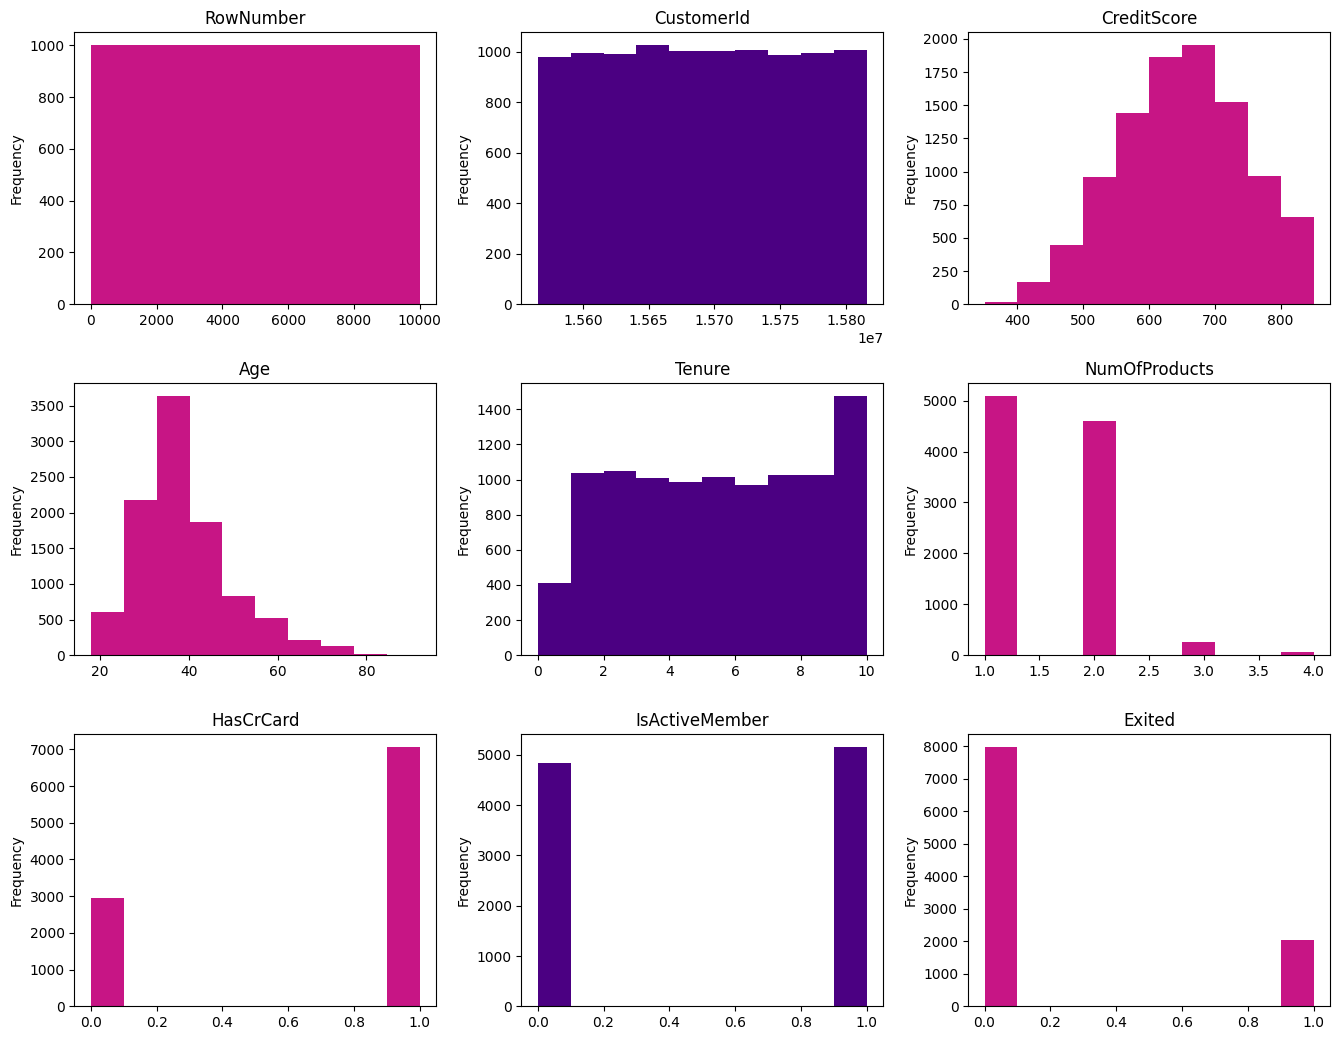

In [11]:
# Initialise the subplot function using number of rows and columns
plt.rcParams["figure.figsize"] = [13.50, 10.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(3, 3)
  
df['RowNumber'].plot.hist(title="RowNumber",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['CustomerId'].plot.hist(title="CustomerId",ax=axis[0][1],color="INDIGO")
df['CreditScore'].plot.hist(title="CreditScore",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['Age'].plot.hist(title="Age",ax=axis[1][0],color="MEDIUMVIOLETRED")
df['Tenure'].plot.hist(title="Tenure",ax=axis[1][1],color="INDIGO")
df['NumOfProducts'].plot.hist(title="NumOfProducts",ax=axis[1][2],color="MEDIUMVIOLETRED")
df['HasCrCard'].plot.hist(title="HasCrCard",ax=axis[2][0],color="MEDIUMVIOLETRED")
df['IsActiveMember'].plot.hist(title="IsActiveMember",ax=axis[2][1],color="INDIGO")
df['Exited'].plot.hist(title="Exited",ax=axis[2][2],color="MEDIUMVIOLETRED")

Hence RowNumber and CustomerId is not useful in analysis hence we can drop it

In [12]:
df.drop(['RowNumber'], axis=1, inplace=True)
df.drop(['CustomerId'], axis=1, inplace=True)

In [13]:
df.head(5)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Univarient Analysis for Categorical Variables

In [14]:
categorical

['Surname', 'Geography', 'Gender']

In [15]:
for column in categorical:
    print("--------------------------------")
    print(column)
    print("--------------------------------")
    print(df[column].value_counts()/len(df[column]))
    print("--------------------------------")
    print("\n")

--------------------------------
Surname
--------------------------------
Surname
Smith       0.0032
Scott       0.0029
Martin      0.0029
Walker      0.0028
Brown       0.0026
             ...  
Izmailov    0.0001
Bold        0.0001
Bonham      0.0001
Poninski    0.0001
Burbidge    0.0001
Name: count, Length: 2932, dtype: float64
--------------------------------


--------------------------------
Geography
--------------------------------
Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: count, dtype: float64
--------------------------------


--------------------------------
Gender
--------------------------------
Gender
Male      0.5457
Female    0.4543
Name: count, dtype: float64
--------------------------------




Hence Surname is not useful in analysis hence we can drop it

In [16]:
df.drop(['Surname'], axis=1, inplace=True)

### Bivarient Analyisis contineous - contineous variable

In [ ]:
df.corr()

Hence CreditScore, Tenure, NumofProducts, HasCrCard and EstimatedSalary is not useful in analysis hence we can drop it

In [18]:
df.drop(['CreditScore'], axis=1, inplace=True)
df.drop(['Tenure'], axis=1, inplace=True)
df.drop(['NumOfProducts'], axis=1, inplace=True)
df.drop(['HasCrCard'], axis=1, inplace=True)
df.drop(['EstimatedSalary'], axis=1, inplace=True)

In [19]:
df

,Geography,Gender,Age,Balance,IsActiveMember,Exited
0,France,Female,42,0.00,1,1
1,Spain,Female,41,83807.86,1,0
2,France,Female,42,159660.80,0,1
3,France,Female,39,0.00,0,0
4,Spain,Female,43,125510.82,1,0
...,...,...,...,...,...,...
9995,France,Male,39,0.00,0,0
9996,France,Male,35,57369.61,1,0
9997,France,Female,36,0.00,1,1
9998,Germany,Male,42,75075.31,0,1


In [20]:
categorical = []
contineous = []
for column in df.columns:
    if df[column].dtypes == "int64":
        contineous.append(column)
    if df[column].dtypes == "object":
        categorical.append(column)

In [21]:
categorical

['Geography', 'Gender']

In [22]:
contineous

['Age', 'IsActiveMember', 'Exited']

### Bivarient Analyisis categorical - categorical variable

In [23]:
pd.crosstab(df['Geography'],df['Gender'])

Gender,Female,Male
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


In [24]:
chi2_contingency(pd.crosstab(df['Geography'],df['Gender']))[1]

0.03145869671789379

### Bivarient Analyisis Continuous - Categorical variable

In [25]:
new = ols('Exited ~ Geography',data=df).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
Geography,48.865517,2.0,155.259763,3.958733e-67
Residual,1573.197583,9997.0,NaN,NaN


In [26]:
new = ols('Exited ~ Gender',data=df).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
Gender,18.40216,1.0,114.727989,1.258505e-26
Residual,1603.66094,9998.0,NaN,NaN


In [27]:
new = ols('Age ~ Geography',data=df).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
Geography,2.657333e+03,2.0,12.106271,0.000006
Residual,1.097174e+06,9997.0,NaN,NaN


In [28]:
new = ols('Age ~ Gender',data=df).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
Gender,8.344104e+02,1.0,7.590957,0.005877
Residual,1.098996e+06,9998.0,NaN,NaN


In [29]:
new = ols('IsActiveMember ~ Gender',data=df).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
Gender,1.269458,1.0,5.084033,0.024169
Residual,2496.450442,9998.0,NaN,NaN


In [30]:
new = ols('IsActiveMember ~ Geography',data=df).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
Geography,1.324964,2.0,2.652959,0.070492
Residual,2496.394936,9997.0,NaN,NaN


Remaining Features are fit for analysis

### Missing Value treatement

In [31]:
df.describe()

,Age,Balance,IsActiveMember,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,76485.889288,0.515100,0.203700
std,10.487806,62397.405202,0.499797,0.402769
min,18.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000
50%,37.000000,97198.540000,1.000000,0.000000
75%,44.000000,127644.240000,1.000000,0.000000
max,92.000000,250898.090000,1.000000,1.000000


In [32]:
df.isnull().sum()

Geography         0
Gender            0
Age               0
Balance           0
IsActiveMember    0
Exited            0
dtype: int64

There are no missing values in dataset

### Outliers Treatement

In [33]:
categorical = []
contineous = []
for column in df.columns:
    if df[column].dtypes == "int64":
        contineous.append(column)
    if df[column].dtypes == "object":
        categorical.append(column)

In [34]:
contineous

['Age', 'IsActiveMember', 'Exited']

<Axes: >

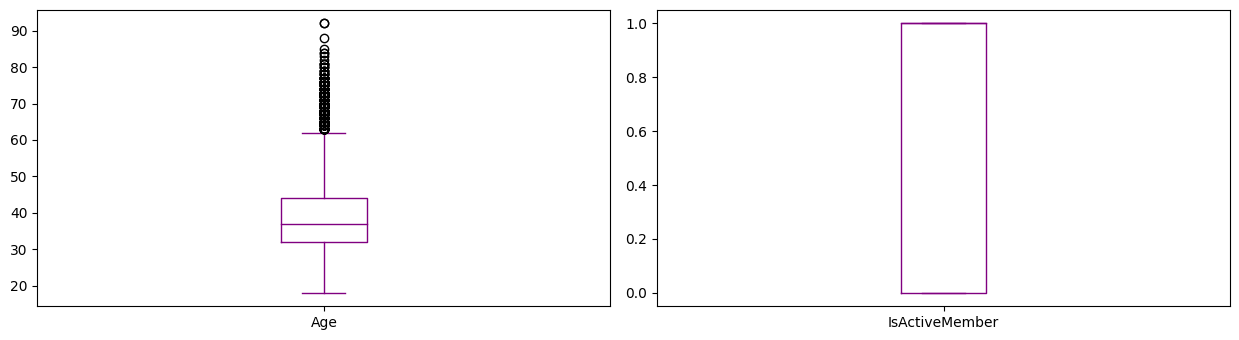

In [35]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

df['Age'].plot.box(ax=axis[0],color="PURPLE")
df['IsActiveMember'].plot.box(ax=axis[1],color="PURPLE")

In [36]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [37]:
lower_limit,upper_limit

(14.0, 62.0)

In [38]:
df.loc[df['Age']>upper_limit,'Age'] = np.mean(df['Age'])
df.loc[df['Age']<lower_limit,'Age'] = np.mean(df['Age'])

<Axes: >

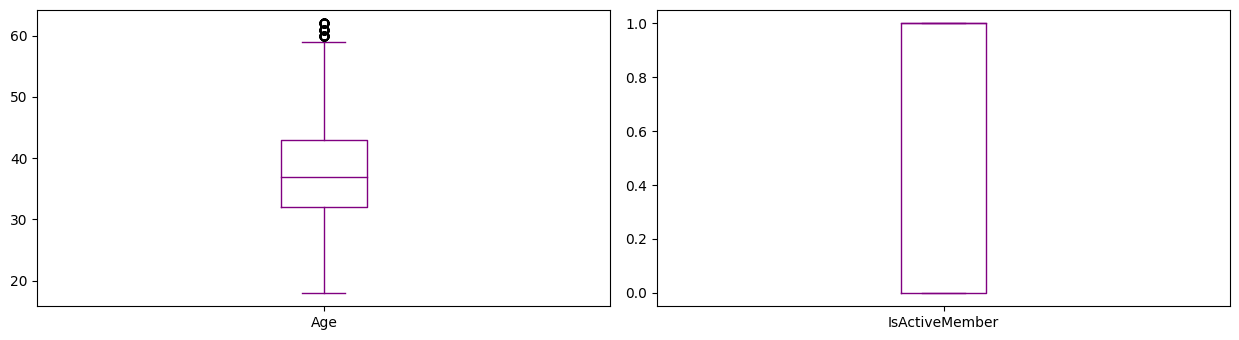

In [39]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

df['Age'].plot.box(ax=axis[0],color="PURPLE")
df['IsActiveMember'].plot.box(ax=axis[1],color="PURPLE")

### Exporting Feature Selected Data

In [40]:
df.to_csv('CCP_FS.csv', encoding='utf-8', index=False)